Exploring tansactional data from www.e-data.gov.ua
Download csv file from the server and let the notebook do mundane work for you

No exception catching, no tests, no bells and whistles. 

In [24]:
import pandas as pd
import numpy as np

In [25]:
# You can put your name here
transactionsfilename='transaction.csv'

In [26]:
#We'll need ukrainian stop words to clean up textual info a bit
with open('ukrainian-stopwords.txt', 'r') as fr:
    stopwords=[x.strip().decode('utf-8') for x in fr.readlines()]

In [27]:
# Run once. Reformats raw csv into something readable. Removes excessive ;, replaces chr(160) with spaces.
# Creates new file with "_" at the begining with reformatted data

with open('_'+transactionsfilename, 'w') as fw:
    with open(transactionsfilename, 'r') as fr:
        for line in fr.readlines():
            line=line.rstrip()
            line=line.replace(chr(160),chr(32))
            countsc=line.count(';')
            if countsc>11:
                indexes=[index for index, c in enumerate(line) if c == ';']
                line=line[0:indexes[11]]+(line[indexes[11]:]).replace(';','|')
            fw.write(line+'\n') 

In [35]:
#Parses csv and convert dates and sums
#contains some badly formatted numbers. Replace them with 0.
def myfloat(value):
  try:
    return float(value)
  except:
    return 0.0


#Read csv
transactions=pd.read_csv('_'+transactionsfilename,sep=';', encoding='cp1251',error_bad_lines=False, warn_bad_lines=True,dtype={0:np.object,2:np.object,4:np.object})
transactions=transactions.fillna('')


#remove all not numbers
transactions[u'СУМА']=transactions[u'СУМА'].map(lambda x: myfloat(''.join([char for char in x if char in '1234567890.'])))

#Parse dates dd.mm.YYYY
#transactions[u'ДАТА']=transactions[u'ДАТА'].map(lambda x:pd.datetime.strptime(x, '%d.%m.%Y'))
transactions[u'ДАТА']=pd.to_datetime(transactions[u'ДАТА'], coerce=True)
print transactions.info()
transactions=transactions.dropna()

Skipping line 9308: expected 12 fields, saw 20
Skipping line 49346: expected 12 fields, saw 16
Skipping line 57616: expected 12 fields, saw 16
Skipping line 62822: expected 12 fields, saw 16

Skipping line 69013: expected 12 fields, saw 16
Skipping line 76344: expected 12 fields, saw 16
Skipping line 81170: expected 12 fields, saw 16
Skipping line 90311: expected 12 fields, saw 14
Skipping line 91922: expected 12 fields, saw 14
Skipping line 91933: expected 12 fields, saw 20
Skipping line 98246: expected 12 fields, saw 16
Skipping line 98326: expected 12 fields, saw 16
Skipping line 108826: expected 12 fields, saw 16
Skipping line 109461: expected 12 fields, saw 16


<class 'pandas.core.frame.DataFrame'>
Int64Index: 109571 entries, 0 to 109570
Data columns (total 12 columns):
№ ТРАНСАКЦІЇ           109571 non-null object
ДАТА                   109569 non-null datetime64[ns]
КОД ПЛАТНИК            109571 non-null object
НАЗВА ПЛАТНИКА         109571 non-null object
МФО ПЛАТНИКА           109571 non-null object
БАНК ПЛАТНИКА          109571 non-null object
КОД ОДЕРЖУВАЧ          109571 non-null object
НАЗВА ОДЕРЖУВАЧ        109571 non-null object
МФО ОДЕРЖУВАЧ          109571 non-null object
БАНК ОДЕРЖУВАЧ         109571 non-null object
СУМА                   109571 non-null float64
ПРИЗНАЧЕННЯ ПЛАТЕЖУ    109571 non-null object
dtypes: datetime64[ns](1), float64(1), object(10)
memory usage: 6.7+ MB
None


In [ ]:
#Extract words from "ПРИЗНАЧЕННЯ ПЛАТЕЖУ" to word_list
word_list = []

#add some words specific to the task
stopwords+=set([u'xxxx',u'р',u'пол',u'від', u'І',u'xxxxр',u'дог',u'повн'])

#remocve numbers and punctuation from 'ПРИЗНАЧЕННЯ ПЛАТЕЖУ' colunm
for p in transactions[u'ПРИЗНАЧЕННЯ ПЛАТЕЖУ']:
    t=''.join([x if not(x in u'01234567890,.!@#$%^&*()-+="/\[]{}<>?|~;') else ' ' for x in p])
    t=[x if not(x in stopwords) and len(x)>3 else '' for x in t.split()]
    word_list.extend(t)

In [ ]:
#convert them to Pandas Series. Could've (Should've?) created series from the start but didn't.
df=pd.Series(word_list)
#count unique words
valueseries=df.value_counts()

#print top 200 words for analysis with Wordle.org. Later found wordcloud package for python. Didn't try it though.
for n in range(200):
    print valueseries.index[n],':',valueseries[n]

In [19]:
#Let's do some plotting
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

#ggplot style is much better than default one
matplotlib.style.use('ggplot')

count    1.080760e+05
mean     1.361199e+05
std      3.768796e+06
min      0.000000e+00
25%      1.752000e+02
50%      9.016750e+02
75%      5.185108e+03
max      5.300895e+08
Name: СУМА, dtype: float64


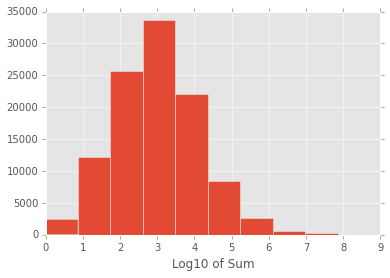

In [22]:
print transactions[u'СУМА'].describe()

#plot a histogram of log10 of 'СУМА' column. Hey! LOOK! GAUSSIAN! Take that Nikolas Taleb!
plt.figure()
np.log10(transactions[u'СУМА']+1).plot('hist')
plt.xlabel(u'Log10 of Sum')
plt.ylabel('')

In [ ]:
#Your code goes here